In [1]:
import pandas as pd
import numpy as np
from IPython.display import display, HTML
import matplotlib.pyplot as plt
from matplotlib import cm as cm
from imblearn.under_sampling import TomekLinks
from IPython.display import Markdown, display
from scipy import stats
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.patches as mpatches
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from keras.utils import np_utils
def printmd(string):
    display(Markdown(string))

Using TensorFlow backend.


In [2]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
def plot_roc_auc(testing_target,laiProba):
    testing_target2 = np_utils.to_categorical(testing_target)
    n_classes = testing_target2.shape[1]

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(testing_target2[:, i], laiProba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    plt.figure()
    lw = 2
    plt.plot(fpr[1], tpr[1], color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc[1])
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characterstics for the Claim class')
    plt.legend(loc="lower right")
    plt.show()
    

In [3]:
df = pd.read_csv('train.csv')

# Reading and printing all the features

In [4]:
columnNames = df.columns
print(columnNames)
feature = len(df.columns)
print('The total number of features are ', feature-2)

Index(['id', 'target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03',
       'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01',
       'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat',
       'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat',
       'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat',
       'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14',
       'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04',
       'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09',
       'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14',
       'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin',
       'ps_calc_19_bin', 'ps_calc_20_bin'],


# How many categorical,binary and continuous variable?

In [5]:
# getting the list of categorical variables and one-hot encoding
import re
categorical = 0
categorical_features = []
binary = 0
binary_features = []
continuous = 0
continuous_features = []
for each in columnNames[2:]:
    if(re.search(r'cat$',each)):
        categorical = categorical+1
        categorical_features.append(each)
    elif (re.search(r'bin$',each)):
        binary = binary+1
        binary_features.append(each)
    else:
        continuous = continuous+1
        continuous_features.append(each)

print('Total categorical features are ', categorical)
print('Total binary features are ', binary)
print('Total continuous features are ', continuous)


Total categorical features are  14
Total binary features are  17
Total continuous features are  26


Creating a baseline model (random forest) with all the features and see how it performs, when all the data is dumped in it.

# Implementing a  Random Forest

The accuracy in % is  96.3111265429
Confusion matrix, without normalization
[[171973      6]
 [  6581      4]]


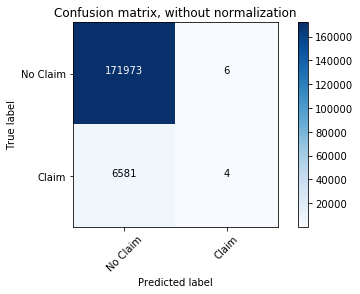

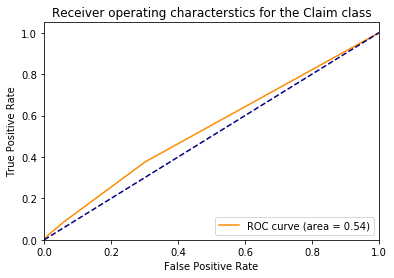

In [6]:
# Implementing a Random Forest Classifier by dumping all data in it, no cleaning and no pre-processing.
dfcat = pd.get_dummies(df, columns=categorical_features)
dfcat.columnsdfcat =dfcat.replace(-1,0)
target = dfcat.target
train = dfcat.drop(['id','target'], axis =1)
train_sub, testing, train_sub_target, testing_target = train_test_split(train, target, test_size=0.30, random_state=42)
clf = RandomForestClassifier(n_jobs=-1, random_state=0)
clf.fit(train_sub, train_sub_target)
lai = clf.predict(testing)
laiProba = clf.predict_proba(testing)
scores = accuracy_score(testing_target, lai)
print('The accuracy in % is ' ,scores * 100)
cm = confusion_matrix(testing_target, lai)
plt.figure()
plot_confusion_matrix(cm, classes=['No Claim', 'Claim'],title='Confusion matrix, without normalization')
plt.show()
laiProba = clf.predict_proba(testing)
plot_roc_auc(testing_target,laiProba)

Even if we see accuracy is 96.31%, we can see from confusion matrix that all the labels for claim class has been misclasifed.      
Hence, our model performs very bad.

Lets try only the binary features in the data set and see how the performance is.

The accuracy in % is  96.3105768504
Confusion matrix, without normalization
[[114651      7]
 [  4385      0]]


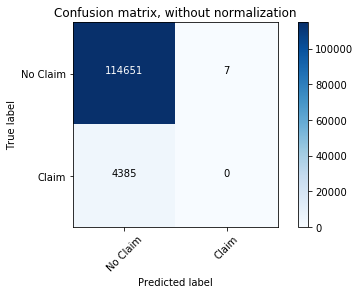

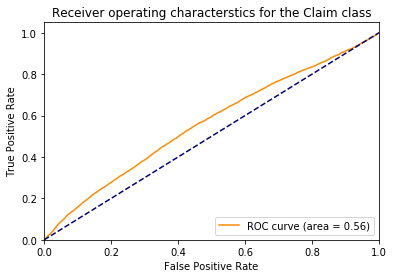

In [7]:
dfbin = df[binary_features]
train_sub, testing, train_sub_target, testing_target = train_test_split(dfbin, target, test_size=0.20, random_state=42)
clf2 = RandomForestClassifier(n_jobs=-1, random_state=0)
clf2.fit(train_sub, train_sub_target)
lai = clf2.predict(testing)
scores = accuracy_score(testing_target, lai)
print('The accuracy in % is ' ,scores * 100)
cm = confusion_matrix(testing_target, lai)
plt.figure()
plot_confusion_matrix(cm, classes=['No Claim', 'Claim'],title='Confusion matrix, without normalization')
plt.show()
laiProba = clf2.predict_proba(testing)
plot_roc_auc(testing_target,laiProba)

NO improvemnt in perormance at all.

# Under Sampling the 'No Claim' class

The accuracy in % is  72.1821631879
Confusion matrix, without normalization
[[5648   57]
 [2142   58]]


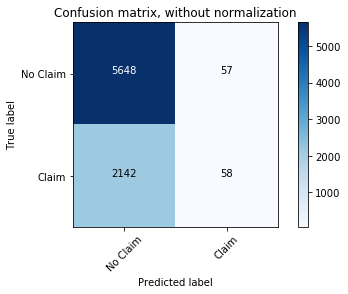

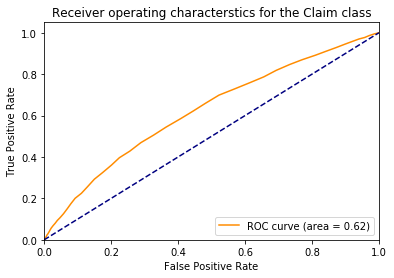

In [8]:
# Under Sampling the majority class and see if there is improvement in the results.
df = pd.read_csv('train.csv')
df1 = df[df.target == 1]
df0 = df[df.target == 0]
df0sampled  = df0.sample(frac = 0.10, random_state = 22)
dfsampled = pd.concat([df0sampled,df1])
dfsampled =dfsampled.replace(-1,0)
target = dfsampled.target
train = dfsampled.drop(['id','target'], axis =1)

train = pd.get_dummies(train, columns=categorical_features)
train
train_sub, testing, train_sub_target, testing_target = train_test_split(train, target, test_size=0.1, random_state=42)
clf = RandomForestClassifier(n_jobs=-1, random_state=0,  n_estimators =100)
clf.fit(train_sub, train_sub_target)
lai =[]
lai = clf.predict(testing)
scores = accuracy_score(testing_target, lai)
print('The accuracy in % is ' ,scores * 100)
cm = confusion_matrix(testing_target, lai)
plt.figure()
plot_confusion_matrix(cm, classes=['No Claim', 'Claim'],title='Confusion matrix, without normalization')
plt.show()
laiProba = clf.predict_proba(testing)
plot_roc_auc(testing_target,laiProba)

The performance is some what better than the previous one, we have 0.62 as the AUC.

The accuracy in % is  72.1821631879
Confusion matrix, without normalization
[[5658   47]
 [2140   60]]


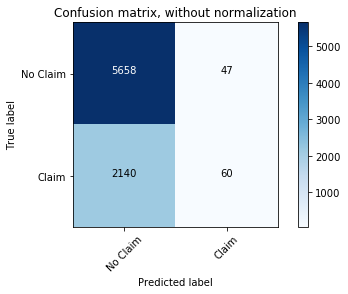

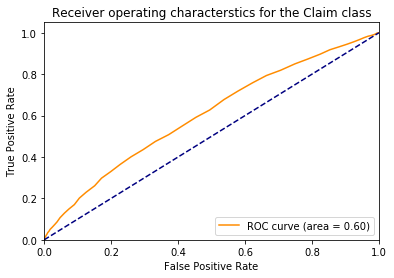

In [9]:
# let's remove all the categorical features (using our assumption from previou study that they are not useful)-

df = pd.read_csv('train.csv')
df1 = df[df.target == 1]
df0 = df[df.target == 0]
df0sampled  = df0.sample(frac = 0.10, random_state = 22)
dfsampled = pd.concat([df0sampled,df1])
dfsampled =dfsampled.replace(-1,0)
target = dfsampled.target
dfsampled = dfsampled.drop(['id', 'target'],axis =1)
train = dfsampled.drop(categorical_features, axis =1)
train_sub, testing, train_sub_target, testing_target = train_test_split(train, target, test_size=0.10, random_state=42)
clf2 = RandomForestClassifier(n_jobs=-1, random_state=0,  n_estimators =100)
clf2.fit(train_sub, train_sub_target)
lai = []
lai = clf2.predict(testing)
scores2 = accuracy_score(testing_target, lai)
print('The accuracy in % is ' ,scores * 100)
cm = confusion_matrix(testing_target, lai)
plt.figure()
plot_confusion_matrix(cm, classes=['No Claim', 'Claim'],title='Confusion matrix, without normalization')
plt.show()
laiProba = clf2.predict_proba(testing)
plot_roc_auc(testing_target,laiProba)

The Performance is same, rather reduced by 0.02 in the AUC.

The accuracy in % is  72.0556609741
Confusion matrix, without normalization
[[5651   54]
 [2155   45]]


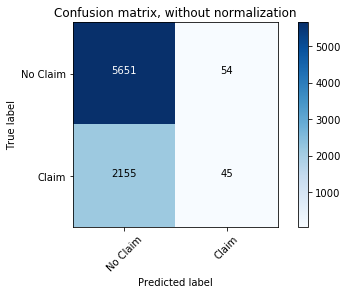

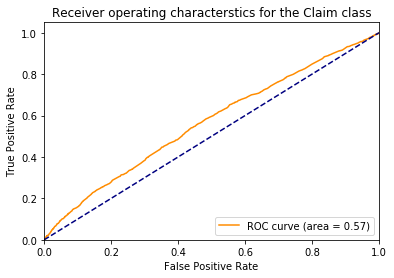

In [10]:
# Removing everything and just using the binary variables-
df = pd.read_csv('train.csv')
df1 = df[df.target == 1]
df0 = df[df.target == 0]
df0sampled  = df0.sample(frac = 0.10, random_state = 22)
dfsampled = pd.concat([df0sampled,df1])
dfsampled =dfsampled.replace(-1,0)
target = dfsampled.target
dfsampled = dfsampled.drop(['id', 'target'],axis =1)
train = dfsampled.drop(categorical_features, axis =1)
train = train.drop(continuous_features, axis =1)
train_sub, testing, train_sub_target, testing_target = train_test_split(train, target, test_size=0.10, random_state=42)
clf3 = RandomForestClassifier(n_jobs=-1, random_state=0,  n_estimators =100)
clf3.fit(train_sub, train_sub_target)
lai = []
lai = clf3.predict(testing)
scores3 = accuracy_score(testing_target, lai)
print('The accuracy in % is ' ,scores3 * 100)
cm = confusion_matrix(testing_target, lai)
plt.figure()
plot_confusion_matrix(cm, classes=['No Claim', 'Claim'],title='Confusion matrix, without normalization')
plt.show()
laiProba = clf3.predict_proba(testing)
plot_roc_auc(testing_target,laiProba)

Performance degrades

# Using the PCA in random forest.

The accuracy in % is  71.8406072106
Confusion matrix, without normalization
[[5558  147]
 [2079  121]]


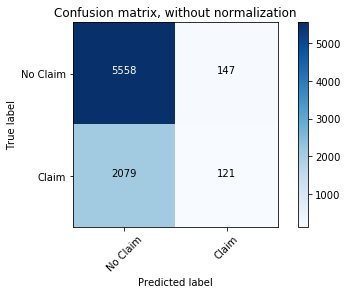

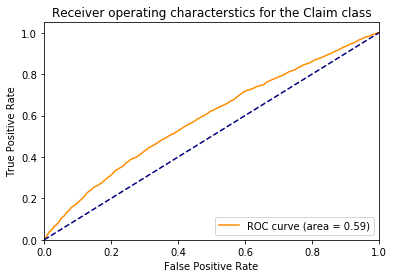

In [11]:
# Using PCA for the Continuous variable and removing the categorical variables-

df = pd.read_csv('train.csv')
dfcont = df[continuous_features]
X=dfcont.values
#Scaling the values
X = scale(X)
pca = PCA(n_components=5)
pca.fit(X)
X1=pca.fit_transform(X)
df = df.drop(categorical_features,axis =1)
df = df.drop(continuous_features,axis =1)
df['PC1'] = X1[:,0] 
df['PC2'] = X1[:,1] 
df['PC3'] = X1[:,2] 
df['PC4'] = X1[:,3] 
df['PC5'] = X1[:,4] 
df1 = df[df.target == 1]
df0 = df[df.target == 0]
df0sampled  = df0.sample(frac = 0.10, random_state = 22)
dfsampled = pd.concat([df0sampled,df1])
dfsampled =dfsampled.replace(-1,0)
target = dfsampled.target
train = dfsampled.drop(['id', 'target'],axis =1)
#train = dfsampled.drop(categorical_features, axis =1)
train_sub, testing, train_sub_target, testing_target = train_test_split(train, target, test_size=0.10, random_state=42)
clf4 = RandomForestClassifier(n_jobs=-1, random_state=0, n_estimators =400, max_depth = 80)
clf4.fit(train_sub, train_sub_target)
lai = []
lai = clf4.predict(testing)
scores4 = accuracy_score(testing_target, lai)
print('The accuracy in % is ' ,scores4 * 100)
cm = confusion_matrix(testing_target, lai)
plt.figure()
plot_confusion_matrix(cm, classes=['No Claim', 'Claim'],title='Confusion matrix, without normalization')
plt.show()
laiProba = clf4.predict_proba(testing)
plot_roc_auc(testing_target,laiProba)

Performance improves a little bit, we will try with different number of PC now.

The accuracy in % is  67.6660341556
Confusion matrix, without normalization
[[5027  678]
 [1878  322]]


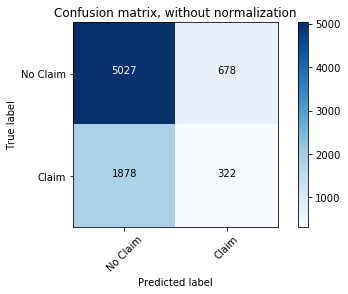

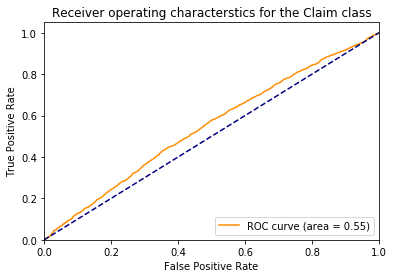

In [12]:
#decreasing the pca to 2
df = pd.read_csv('train.csv')
dfcont = df[continuous_features]
X=dfcont.values
#Scaling the values
X = scale(X)
pca = PCA(n_components=2)
pca.fit(X)
X1=pca.fit_transform(X)
df = df.drop(categorical_features,axis =1)
df = df.drop(continuous_features,axis =1)
df['PC1'] = X1[:,0] 
df['PC2'] = X1[:,1] 
df1 = df[df.target == 1]
df0 = df[df.target == 0]
df0sampled  = df0.sample(frac = 0.10, random_state = 22)
dfsampled = pd.concat([df0sampled,df1])
dfsampled =dfsampled.replace(-1,0)
target = dfsampled.target
train = dfsampled.drop(['id', 'target'],axis =1)
#train = dfsampled.drop(categorical_features, axis =1)
train_sub, testing, train_sub_target, testing_target = train_test_split(train, target, test_size=0.10, random_state=42)
clf4 = RandomForestClassifier(n_jobs=-1, random_state=0, n_estimators =400, max_depth = 80)
clf4.fit(train_sub, train_sub_target)
lai = []
lai = clf4.predict(testing)
scores4 = accuracy_score(testing_target, lai)
print('The accuracy in % is ' ,scores4 * 100)
cm = confusion_matrix(testing_target, lai)
plt.figure()
plot_confusion_matrix(cm, classes=['No Claim', 'Claim'],title='Confusion matrix, without normalization')
plt.show()
laiProba = clf4.predict_proba(testing)
plot_roc_auc(testing_target,laiProba)

Now lets try with large number of PC, so we can conclude what is the optimum number of PC's

The accuracy in % is  71.9165085389
Confusion matrix, without normalization
[[5633   72]
 [2148   52]]


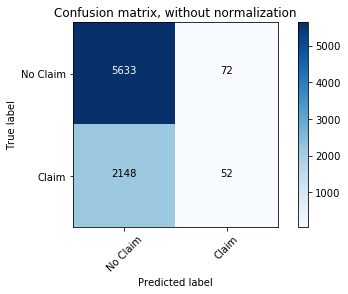

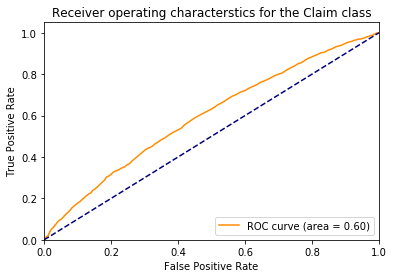

In [13]:
#increase the pca to 10
df = pd.read_csv('train.csv')
dfcont = df[continuous_features]
X=dfcont.values
#Scaling the values
X = scale(X)
pca = PCA(n_components=10)
pca.fit(X)
X1=pca.fit_transform(X)
df = df.drop(categorical_features,axis =1)
df = df.drop(continuous_features,axis =1)
df['PC1'] = X1[:,0] 
df['PC2'] = X1[:,1] 
df['PC3'] = X1[:,2] 
df['PC4'] = X1[:,3]
df['PC5'] = X1[:,4] 
df['PC6'] = X1[:,5]
df['PC7'] = X1[:,6] 
df['PC8'] = X1[:,7]
df['PC9'] = X1[:,8] 
df['PC10'] = X1[:,9]
df1 = df[df.target == 1]
df0 = df[df.target == 0]
df0sampled  = df0.sample(frac = 0.10, random_state = 22)
dfsampled = pd.concat([df0sampled,df1])
dfsampled =dfsampled.replace(-1,0)
target = dfsampled.target
train = dfsampled.drop(['id', 'target'],axis =1)
#train = dfsampled.drop(categorical_features, axis =1)
train_sub, testing, train_sub_target, testing_target = train_test_split(train, target, test_size=0.10, random_state=42)
clf4 = RandomForestClassifier(n_jobs=-1, random_state=0, n_estimators =400, max_depth = 80)
clf4.fit(train_sub, train_sub_target)
lai = []
lai = clf4.predict(testing)
scores4 = accuracy_score(testing_target, lai)
print('The accuracy in % is ' ,scores4 * 100)
cm = confusion_matrix(testing_target, lai)
plt.figure()
plot_confusion_matrix(cm, classes=['No Claim', 'Claim'],title='Confusion matrix, without normalization')
plt.show()
laiProba = clf4.predict_proba(testing)
plot_roc_auc(testing_target,laiProba)

The performance improves, hence we decide to stick with less number of PC, one final try with only 1 PC.

The accuracy in % is  61.3535736875
Confusion matrix, without normalization
[[4237 1468]
 [1587  613]]


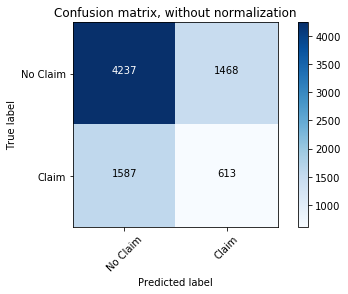

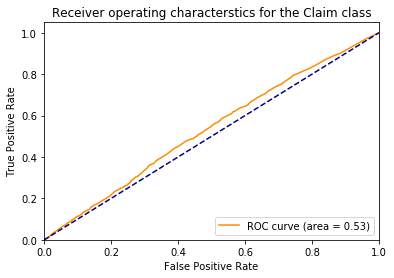

In [14]:
#try with 1 pca
df = pd.read_csv('train.csv')
dfcont = df[continuous_features]
X=dfcont.values
#Scaling the values
X = scale(X)
pca = PCA(n_components=1)
pca.fit(X)
X1=pca.fit_transform(X)
df = df.drop(categorical_features,axis =1)
df = df.drop(continuous_features,axis =1)
df['PC1'] = X1[:,0] 
df1 = df[df.target == 1]
df0 = df[df.target == 0]
df0sampled  = df0.sample(frac = 0.10, random_state = 22)
dfsampled = pd.concat([df0sampled,df1])
dfsampled =dfsampled.replace(-1,0)
target = dfsampled.target
train = dfsampled.drop(['id', 'target'],axis =1)
#train = dfsampled.drop(categorical_features, axis =1)
train_sub, testing, train_sub_target, testing_target = train_test_split(train, target, test_size=0.10, random_state=42)
clf4 = RandomForestClassifier(n_jobs=-1, random_state=0, n_estimators =400, max_depth = 80)
clf4.fit(train_sub, train_sub_target)
lai = []
lai = clf4.predict(testing)
scores4 = accuracy_score(testing_target, lai)
print('The accuracy in % is ' ,scores4 * 100)
cm = confusion_matrix(testing_target, lai)
plt.figure()
plot_confusion_matrix(cm, classes=['No Claim', 'Claim'],title='Confusion matrix, without normalization')
plt.show()
laiProba = clf4.predict_proba(testing)
plot_roc_auc(testing_target,laiProba)

Overall performance goes down. Hence 5 to 10 PC are optimum

# Implementing the Ensemble Learning -

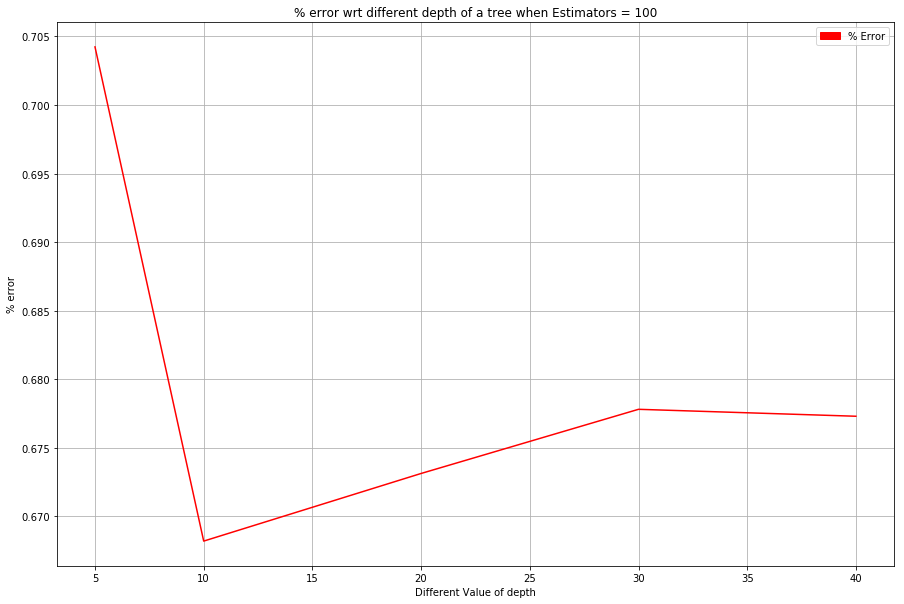

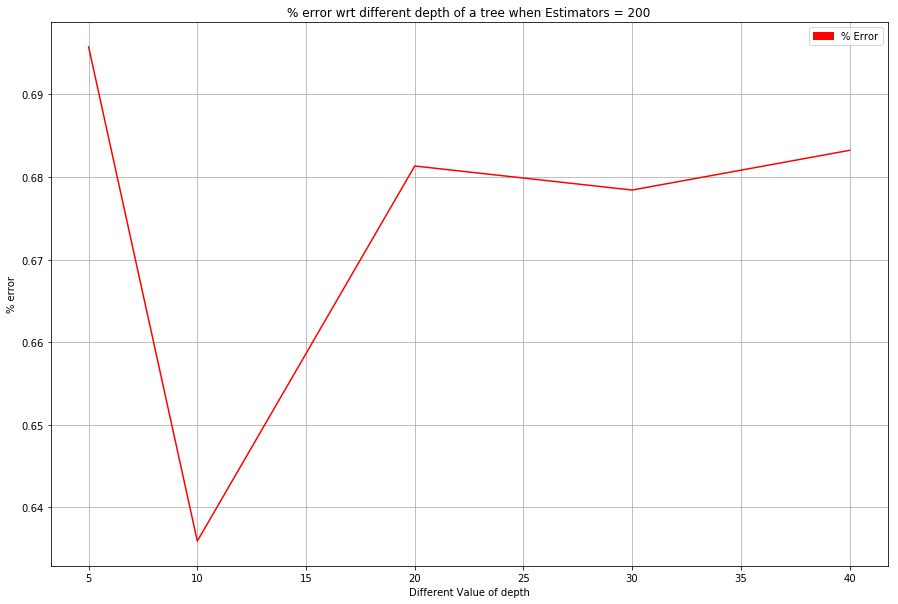

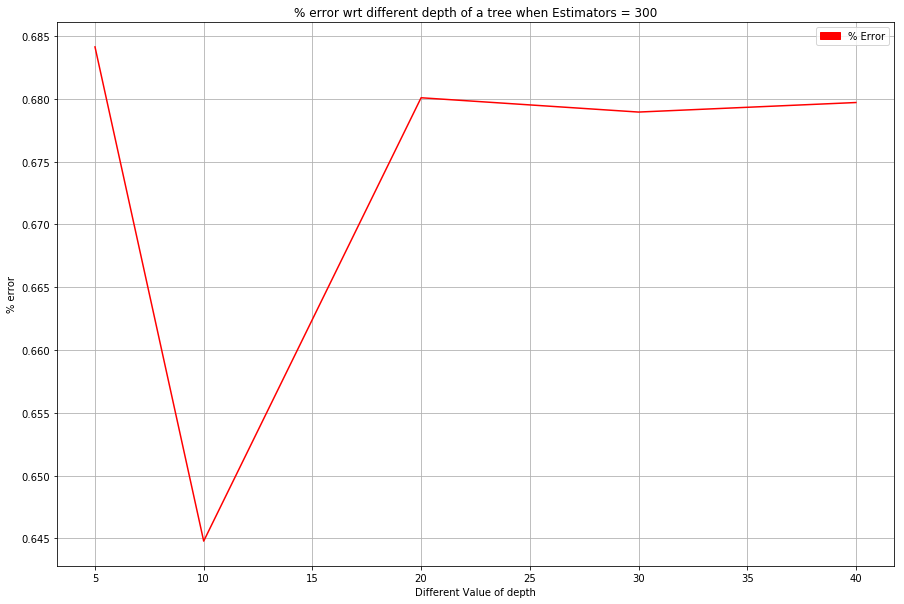

In [15]:
#Lts try  ensemble learning -
#$ trying with 2 pca only---
df = pd.read_csv('train.csv')
dfcont = df[continuous_features]
X=dfcont.values
#Scaling the values
X = scale(X)
pca = PCA(n_components=2)
pca.fit(X)
X1=pca.fit_transform(X)
df = df.drop(categorical_features,axis =1)
df = df.drop(continuous_features,axis =1)
df['PC1'] = X1[:,0] 
df['PC2'] = X1[:,1] 
df1 = df[df.target == 1]
df0 = df[df.target == 0]
df0sampled  = df0.sample(frac = 0.10, random_state = 22)
dfsampled = pd.concat([df0sampled,df1])
dfsampled =dfsampled.replace(-1,0)
target = dfsampled.target
train = dfsampled.drop(['id', 'target'],axis =1)
#train = dfsampled.drop(categorical_features, axis =1)
train_sub, testing, train_sub_target, testing_target = train_test_split(train, target, test_size=0.10, random_state=42)


rng = np.random.RandomState(1)
absList = []
depths = [5,10,20,30,40]
estimators = [100,200,300]
for eachEstimator in estimators:
    absList = []
    for depth in depths:
        regr_1 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=depth),n_estimators=eachEstimator, random_state=rng)
        regr_1.fit(train_sub, train_sub_target)
        y_1 = regr_1.predict(testing)
        #s = (y_1 - math_target_test.values)
        #s = abs(s)
        #soap = s.sum()
        absoluteError = accuracy_score(testing_target, y_1) 
        absList.append(absoluteError)
    plt.figure(figsize=(15,10))
    plt.plot(depths,absList, color = 'r')
    plt.xlabel('Different Value of depth')
    plt.ylabel('% error')
    red_patch = mpatches.Patch(color='r', label='% Error')
    plt.legend(handles=[red_patch])
    xString = '% error wrt different depth of a tree when Estimators = ' + str(eachEstimator)
    plt.title(xString)
    plt.grid()
    plt.show()

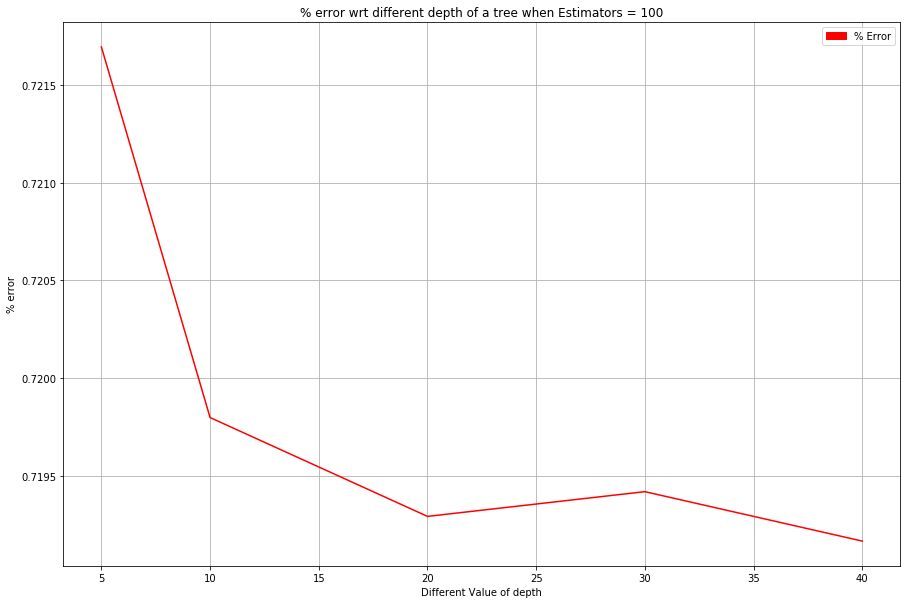

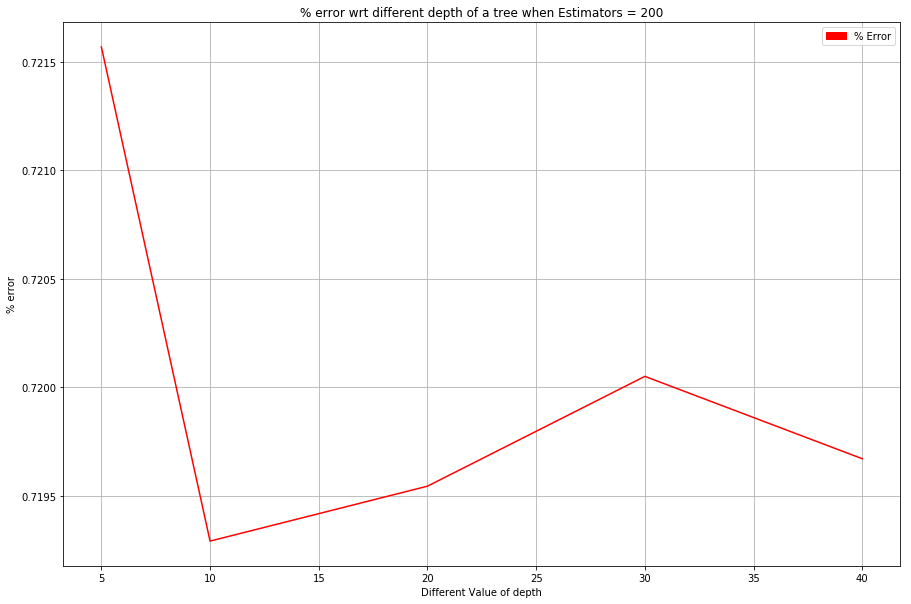

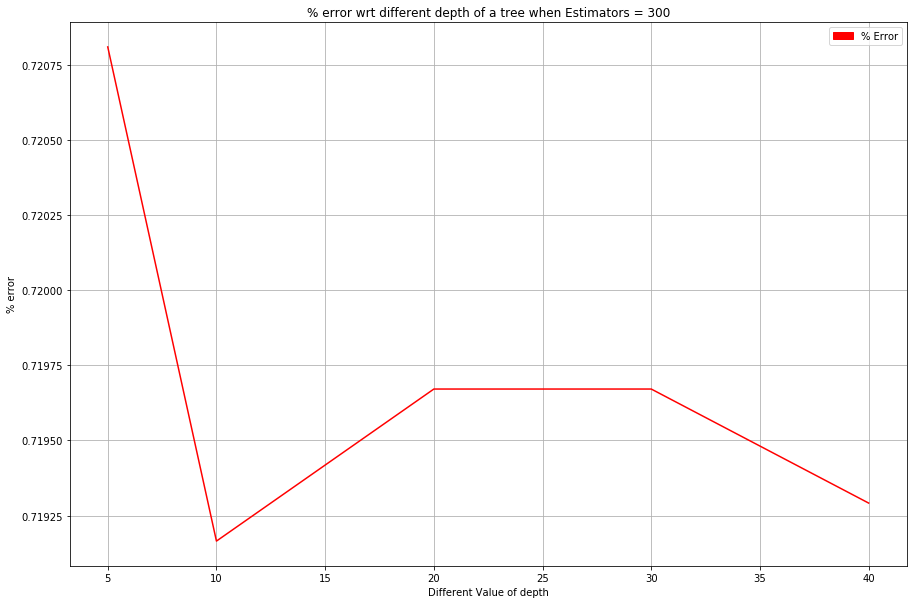

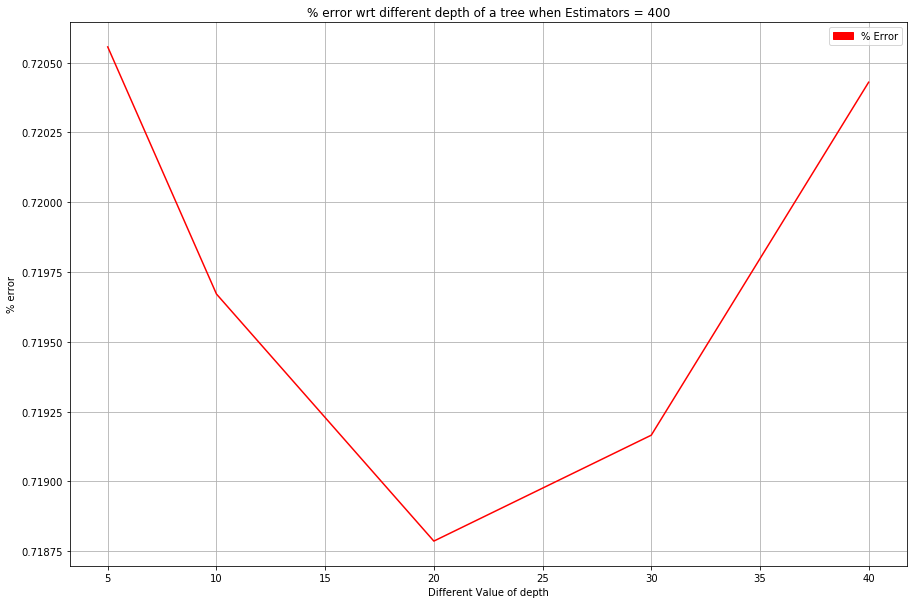

In [16]:
# Just using all binary variables-
df = pd.read_csv('train.csv')

df = df.drop(categorical_features,axis =1)
df = df.drop(continuous_features,axis =1)

df1 = df[df.target == 1]
df0 = df[df.target == 0]
df0sampled  = df0.sample(frac = 0.10, random_state = 22)
dfsampled = pd.concat([df0sampled,df1])
dfsampled =dfsampled.replace(-1,0)
target = dfsampled.target
train = dfsampled.drop(['id', 'target'],axis =1)
#train = dfsampled.drop(categorical_features, axis =1)
train_sub, testing, train_sub_target, testing_target = train_test_split(train, target, test_size=0.10, random_state=42)


rng = np.random.RandomState(1)
absList = []
depths = [5,10,20,30,40]
estimators = [100,200,300,400]
for eachEstimator in estimators:
    absList = []
    for depth in depths:
        regr_1 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=depth),n_estimators=eachEstimator, random_state=rng)
        regr_1.fit(train_sub, train_sub_target)
        y_1 = regr_1.predict(testing)
        #s = (y_1 - math_target_test.values)
        #s = abs(s)
        #soap = s.sum()
        absoluteError = accuracy_score(testing_target, y_1) 
        absList.append(absoluteError)
    plt.figure(figsize=(15,10))
    plt.plot(depths,absList, color = 'r')
    plt.xlabel('Different Value of depth')
    plt.ylabel('% error')
    red_patch = mpatches.Patch(color='r', label='% Error')
    plt.legend(handles=[red_patch])
    xString = '% error wrt different depth of a tree when Estimators = ' + str(eachEstimator)
    plt.title(xString)
    plt.grid()
    plt.show()

The accuracy in % is  72.0430107527
Confusion matrix, without normalization
[[5653   52]
 [2158   42]]


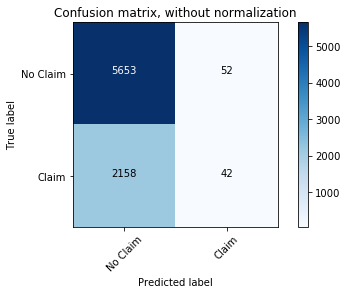

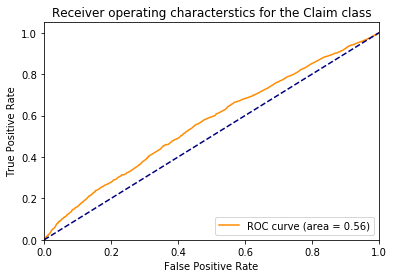

In [28]:
# using the best model from Ensemble Learning
predictions = regr_1.predict(testing)
scores = accuracy_score(testing_target, predictions) 
print('The accuracy in % is ' ,scores * 100)
cm = confusion_matrix(testing_target, predictions)
plt.figure()
plot_confusion_matrix(cm, classes=['No Claim', 'Claim'],title='Confusion matrix, without normalization')
plt.show()
laiProba = regr_1.predict_proba(testing)
plot_roc_auc(testing_target,laiProba)

# Deep Learning Model

Train on 71141 samples, validate on 7905 samples
Epoch 1/50
71141/71141 [==============================] - 4s - loss: 0.5726 - acc: 0.7263 - val_loss: 0.5713 - val_acc: 0.7249
Epoch 2/50
71141/71141 [==============================] - 4s - loss: 0.5647 - acc: 0.7291 - val_loss: 0.5707 - val_acc: 0.7228
Epoch 3/50
71141/71141 [==============================] - 4s - loss: 0.5618 - acc: 0.7305 - val_loss: 0.5696 - val_acc: 0.7256
Epoch 4/50
71141/71141 [==============================] - 4s - loss: 0.5580 - acc: 0.7338 - val_loss: 0.5704 - val_acc: 0.7250
Epoch 5/50
71141/71141 [==============================] - 3s - loss: 0.5524 - acc: 0.7383 - val_loss: 0.5765 - val_acc: 0.7231
Epoch 6/50
71141/71141 [==============================] - 3s - loss: 0.5455 - acc: 0.7425 - val_loss: 0.5765 - val_acc: 0.7218
Epoch 7/50
71141/71141 [==============================] - 3s - loss: 0.5361 - acc: 0.7471 - val_loss: 0.5870 - val_acc: 0.7192
Epoch 8/50
71141/71141 [==============================] - 3s -

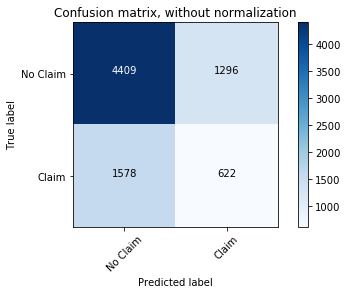

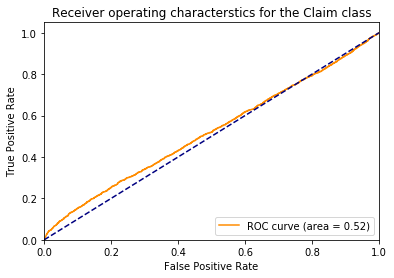

In [17]:
# Time to apply the deep learning library 
# Input is the entire sampled data set with no feature extraction.

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras.utils import np_utils
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# let's throw everything to the deep DNN-
df = pd.read_csv('train.csv')
df1 = df[df.target == 1]
df0 = df[df.target == 0]
df0sampled  = df0.sample(frac = 0.1, random_state = 22)
dfsampled = pd.concat([df0sampled,df1])
dfsampled =dfsampled.replace(-1,0)
target = dfsampled.target
train = dfsampled.drop(['id','target'], axis =1)

train = pd.get_dummies(train, columns=categorical_features)
train
train= train.values
train = scale(train)
train_sub, testing, train_sub_target, testing_target = train_test_split(train, target, test_size=0.10, random_state=42)


train_subValues = train_sub
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(train_sub_target)
encoded_Y = encoder.transform(train_sub_target)
train_sub_target = np_utils.to_categorical(train_sub_target)
testing_target2 = np_utils.to_categorical(testing_target)

# create model
model = Sequential()
model.add(Dense(256, input_dim=219, kernel_initializer='normal', activation='relu'))
model.add(Dense(128,  kernel_initializer='normal', activation='relu'))
model.add(Dense(64, kernel_initializer='normal', activation='relu'))
model.add(Dense(32, kernel_initializer='normal', activation='relu'))
model.add(Dense(2, kernel_initializer='normal', activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(train_subValues, train_sub_target,epochs = 50,validation_data  = (testing,testing_target2))

predictions = model.predict_classes(testing)
scores = accuracy_score(testing_target, predictions) 
print('The accuracy in % is ' ,scores * 100)
cm = confusion_matrix(testing_target, predictions)
plt.figure()
plot_confusion_matrix(cm, classes=['No Claim', 'Claim'],title='Confusion matrix, without normalization')
plt.show()
laiProba = model.predict(testing)
plot_roc_auc(testing_target,laiProba)

Train on 71141 samples, validate on 7905 samples
Epoch 1/50
71141/71141 [==============================] - 3s - loss: 0.5837 - acc: 0.7258 - val_loss: 0.5857 - val_acc: 0.7217
Epoch 2/50
71141/71141 [==============================] - 3s - loss: 0.5809 - acc: 0.7260 - val_loss: 0.5834 - val_acc: 0.7217
Epoch 3/50
71141/71141 [==============================] - 3s - loss: 0.5806 - acc: 0.7260 - val_loss: 0.5850 - val_acc: 0.7217
Epoch 4/50
71141/71141 [==============================] - 3s - loss: 0.5801 - acc: 0.7260 - val_loss: 0.5847 - val_acc: 0.7217
Epoch 5/50
71141/71141 [==============================] - 3s - loss: 0.5801 - acc: 0.7260 - val_loss: 0.5837 - val_acc: 0.7217
Epoch 6/50
71141/71141 [==============================] - 3s - loss: 0.5798 - acc: 0.7260 - val_loss: 0.5835 - val_acc: 0.7217
Epoch 7/50
71141/71141 [==============================] - 3s - loss: 0.5797 - acc: 0.7260 - val_loss: 0.5841 - val_acc: 0.7217
Epoch 8/50
71141/71141 [==============================] - 3s -

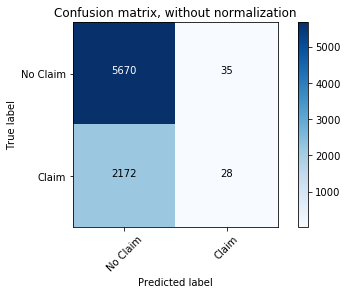

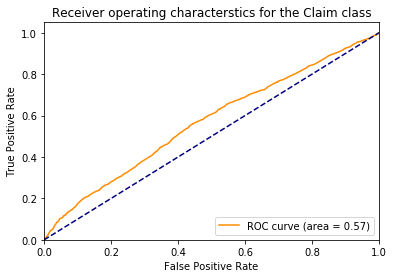

In [18]:
# input is only Binary Variables
df = pd.read_csv('train.csv')
df = df.drop(categorical_features,axis =1)
df = df.drop(continuous_features,axis =1)
df1 = df[df.target == 1]
df0 = df[df.target == 0]
df0sampled  = df0.sample(frac = 0.10, random_state = 22)
dfsampled = pd.concat([df0sampled,df1])
dfsampled =dfsampled.replace(-1,0)
target = dfsampled.target
train = dfsampled.drop(['id', 'target'],axis =1)

train_sub, testing, train_sub_target, testing_target = train_test_split(train, target, test_size=0.10, random_state=42)
train_subValues = train_sub.values
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(train_sub_target)
encoded_Y = encoder.transform(train_sub_target)
train_sub_target = np_utils.to_categorical(train_sub_target)
testing_target2 = np_utils.to_categorical(testing_target)

# create model
model = Sequential()
model.add(Dense(256, input_dim=17, kernel_initializer='normal', activation='relu'))
model.add(Dense(128,  kernel_initializer='normal', activation='relu'))
model.add(Dense(64, kernel_initializer='normal', activation='relu'))
model.add(Dense(32, kernel_initializer='normal', activation='relu'))
model.add(Dense(2, kernel_initializer='normal', activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(train_subValues, train_sub_target,epochs = 50,validation_data  = (testing.values,testing_target2), verbose =1)
predictions = model.predict_classes(testing.values)
scores = accuracy_score(testing_target, predictions) 
print('\n The accuracy in % is ' ,scores * 100)
cm = confusion_matrix(testing_target, predictions)
plt.figure()
plot_confusion_matrix(cm, classes=['No Claim', 'Claim'],title='Confusion matrix, without normalization')
plt.show()
laiProba = model.predict(testing.values)
plot_roc_auc(testing_target,laiProba)

Train on 71141 samples, validate on 7905 samples
Epoch 1/50
71141/71141 [==============================] - 3s - loss: 0.5773 - acc: 0.7259 - val_loss: 0.5754 - val_acc: 0.7217
Epoch 2/50
71141/71141 [==============================] - 3s - loss: 0.5737 - acc: 0.7260 - val_loss: 0.5753 - val_acc: 0.7217
Epoch 3/50
71141/71141 [==============================] - 3s - loss: 0.5728 - acc: 0.7259 - val_loss: 0.5745 - val_acc: 0.7217
Epoch 4/50
71141/71141 [==============================] - 3s - loss: 0.5723 - acc: 0.7259 - val_loss: 0.5750 - val_acc: 0.7217
Epoch 5/50
71141/71141 [==============================] - 3s - loss: 0.5719 - acc: 0.7260 - val_loss: 0.5754 - val_acc: 0.7226
Epoch 6/50
71141/71141 [==============================] - 3s - loss: 0.5715 - acc: 0.7257 - val_loss: 0.5753 - val_acc: 0.7227
Epoch 7/50
71141/71141 [==============================] - 3s - loss: 0.5706 - acc: 0.7262 - val_loss: 0.5744 - val_acc: 0.7229
Epoch 8/50
71141/71141 [==============================] - 3s -

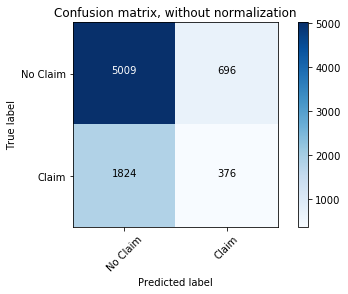

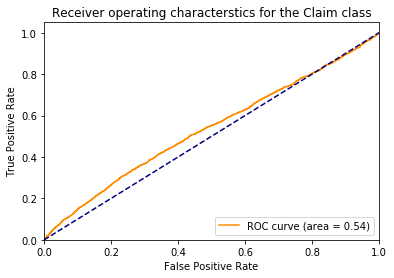

In [19]:
# Input is binary with 5 PCA
df = pd.read_csv('train.csv')
dfcont = df[continuous_features]
X=dfcont.values
#Scaling the values
X = scale(X)
pca = PCA(n_components=5)
pca.fit(X)
X1=pca.fit_transform(X)
df = df.drop(categorical_features,axis =1)
df = df.drop(continuous_features,axis =1)
df['PC1'] = X1[:,0] 
df['PC2'] = X1[:,1] 
df['PC3'] = X1[:,2] 
df['PC4'] = X1[:,3] 
df['PC5'] = X1[:,4] 
df1 = df[df.target == 1]
df0 = df[df.target == 0]
df0sampled  = df0.sample(frac = 0.10, random_state = 22)
dfsampled = pd.concat([df0sampled,df1])
dfsampled =dfsampled.replace(-1,0)
target = dfsampled.target
train = dfsampled.drop(['id', 'target'],axis =1)
train_sub, testing, train_sub_target, testing_target = train_test_split(train, target, test_size=0.10, random_state=42)
train_subValues = train_sub.values
testing = testing.values
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(train_sub_target)
encoded_Y = encoder.transform(train_sub_target)
train_sub_target = np_utils.to_categorical(train_sub_target)
testing_target2 = np_utils.to_categorical(testing_target)
# create model
model = Sequential()
model.add(Dense(256, input_dim=22, kernel_initializer='normal', activation='relu'))
model.add(Dense(128,  kernel_initializer='normal', activation='relu'))
model.add(Dense(64, kernel_initializer='normal', activation='relu'))
model.add(Dense(32, kernel_initializer='normal', activation='relu'))
model.add(Dense(2, kernel_initializer='normal', activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(train_subValues, train_sub_target,epochs = 50, validation_data  = (testing,testing_target2))
predictions = model.predict_classes(testing)

scores = accuracy_score(testing_target, predictions) 
print('The accuracy in % is ' ,scores * 100)
cm = confusion_matrix(testing_target, predictions)
plt.figure()
plot_confusion_matrix(cm, classes=['No Claim', 'Claim'],title='Confusion matrix, without normalization')
plt.show()
laiProba = model.predict(testing)
plot_roc_auc(testing_target,laiProba)

# Feature Engineering

The objective of this last section is to try some feature engineering and see if the results can be improved.

In [20]:
# Feature Importance with Extra Trees Classifier
from pandas import read_csv
from sklearn.ensemble import ExtraTreesClassifier

# load data
df = pd.read_csv('train.csv')
df1 = df[df.target == 1]
df0 = df[df.target == 0]
df0sampled  = df0.sample(frac = 0.1, random_state = 22)
dfsampled = pd.concat([df0sampled,df1])
dfsampled =dfsampled.replace(-1,0)
target = dfsampled.target
train = dfsampled.drop(['id','target'], axis =1)
train = pd.get_dummies(train,columns=categorical_features )
X = train.values
Y = target.values
# feature extraction
modelFeature = ExtraTreesClassifier()
modelFeature.fit(X, Y)
print(modelFeature.feature_importances_)

[  1.97844730e-02   2.23184070e-02   6.88596545e-03   6.39501652e-03
   6.41889101e-03   6.12267946e-03   1.00759406e-04   3.27206458e-04
   1.41700356e-03   2.01112046e-04   1.42119384e-03   2.20445379e-02
   8.64649867e-03   6.31310879e-03   6.48502617e-03   2.07600890e-02
   2.16091165e-02   2.17125625e-02   1.28179739e-02   1.58140496e-02
   2.23468347e-02   1.80959770e-02   1.95827638e-02   2.12082666e-02
   2.13118877e-02   2.15170040e-02   2.04454119e-02   2.00494154e-02
   2.05022636e-02   2.02306628e-02   2.04110292e-02   1.98218503e-02
   2.14691337e-02   2.12042003e-02   2.02497093e-02   2.08675296e-02
   2.09911688e-02   9.02146511e-03   1.45522442e-02   1.45051308e-02
   1.34068318e-02   1.42110151e-02   1.05270172e-02   4.80568563e-04
   9.21642587e-03   8.46296748e-03   4.51141918e-03   2.67327066e-03
   7.25388078e-03   7.25191943e-03   7.42635424e-03   1.89928165e-03
   1.84699030e-03   1.87164836e-03   3.16694920e-03   5.37456498e-04
   3.58391586e-03   1.75129885e-03

From the above we can conclude that Extra tree classifier did not helped much in getting the right features, all the values are
small to consider.

Let's try a Recurrent Feature selction technique using an Ensemble tree-            
Recurrent Feature selection process led us the system into an infinite loop, because it could not reduce the desired number of features.               
Hence, RF selection method is dropped and the code is removed from this cell.

In [21]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
kbest = SelectKBest(chi2, k=200)
fit = kbest.fit(X, Y)
print(fit.scores_)
features = fit.transform(X)
reducedmodel = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5),n_estimators=100, random_state=2)
train_sub, testing, train_sub_target, testing_target = train_test_split(features, Y, test_size=0.05, random_state=42)
reducedmodel.fit(train_sub, train_sub_target)



[  3.11670675e+02   4.48931576e+01   3.35306375e+02   3.47930384e+02
   7.20812029e+01   2.49186943e+01   6.84657717e-02   1.20981600e+00
   2.57916945e+01   6.52584897e-01   2.57030942e+01   3.33231118e+02
   1.10359601e+02   4.67735072e+02   4.06733176e+00   3.41282492e+01
   2.05063885e+02   1.68143091e+02   2.18182317e-01   6.48157650e+00
   8.04491628e+01   4.84669635e-02   5.77556784e+01   2.82479789e-01
   1.33988645e-01   3.99286243e-02   1.85984488e-03   2.05035164e-01
   2.33475895e-03   2.09926106e-01   5.17859440e-03   2.05061669e-01
   1.21384858e-01   1.87493618e-01   7.71109515e-01   7.52726979e-01
   9.97074194e-01   3.76271354e-02   2.37088739e-02   4.78763756e-03
   7.32382337e-01   2.70341598e-01   2.47497507e-01   8.18153441e+01
   4.22814746e+00   7.00283817e+00   2.63162556e-01   2.03268739e+00
   1.62449560e+01   2.20349305e+01   4.82421088e+01   2.30166309e+01
   1.24321583e+02   6.63111184e+00   8.19612962e+01   4.36133544e+00
   1.95968970e+02   1.45977480e+01

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=100, random_state=2)

The accuracy in % is  69.8962813053
Confusion matrix, without normalization
[[2564  295]
 [ 895  199]]


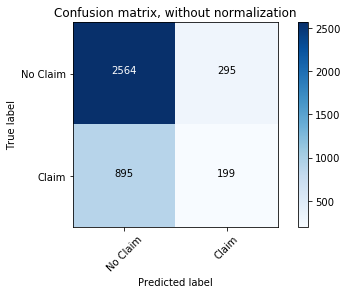

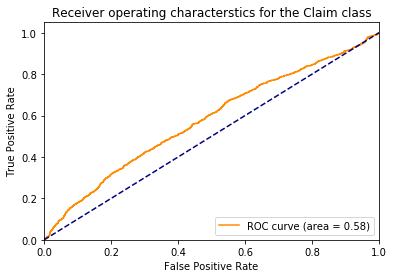

In [22]:
predictions = reducedmodel.predict(testing)

scores = accuracy_score(testing_target, predictions) 
print('The accuracy in % is ' ,scores * 100)
cm = confusion_matrix(testing_target, predictions)
plt.figure()
plot_confusion_matrix(cm, classes=['No Claim', 'Claim'],title='Confusion matrix, without normalization')
plt.show()
laiProba = reducedmodel.predict_proba(testing)
plot_roc_auc(testing_target,laiProba)

# Apply this to Deep Learning and record the results

In [23]:
def get_results(features,i):
    train_sub, testing, train_sub_target, testing_target = train_test_split(features, Y, test_size=0.05, random_state=42)
    train_sub_target = np_utils.to_categorical(train_sub_target)
    testing_target2 = np_utils.to_categorical(testing_target)

    # create reducedModel
    reducedModel = Sequential()
    reducedModel.add(Dense(256, input_dim=i, kernel_initializer='normal', activation='relu'))
    reducedModel.add(Dense(128,  kernel_initializer='normal', activation='relu'))
    reducedModel.add(Dense(64, kernel_initializer='normal', activation='relu'))
    reducedModel.add(Dense(32, kernel_initializer='normal', activation='relu'))
    reducedModel.add(Dense(2, kernel_initializer='normal', activation='sigmoid'))
    # Compile reducedModel
    reducedModel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    reducedModel.fit(train_sub, train_sub_target,epochs = 50,validation_data  = (testing,testing_target2), verbose =0)
    predictions = reducedModel.predict_classes(testing)
    scores = accuracy_score(testing_target, predictions) 
    print('The accuracy in % is ' ,scores * 100)
    cm = confusion_matrix(testing_target, predictions)
    plt.figure()
    plot_confusion_matrix(cm, classes=['No Claim', 'Claim'],title='Confusion matrix, without normalization')
    plt.show()
    laiProba = reducedModel.predict(testing)
    plot_roc_auc(testing_target,laiProba)
    

Simulation for top  10 features
3200/3953 [=======================>......] - ETA: 0sThe accuracy in % is  72.2742221098
Confusion matrix, without normalization
[[2826   33]
 [1063   31]]


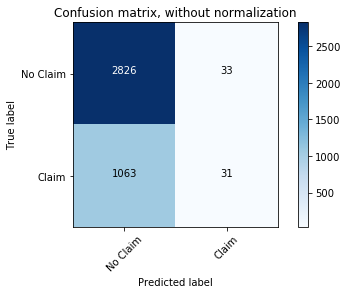

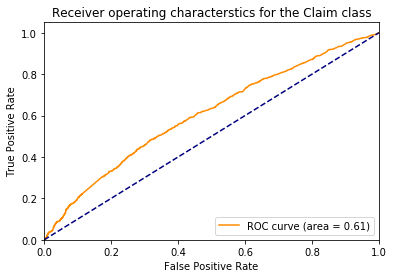

Simulation for top  30 features
3424/3953 [========================>.....] - ETA: 0sThe accuracy in % is  71.6164938022
Confusion matrix, without normalization
[[2708  151]
 [ 971  123]]


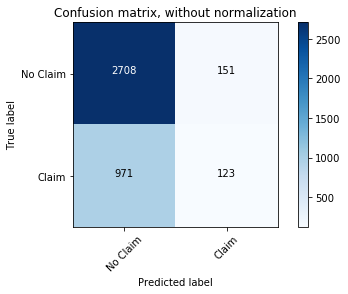

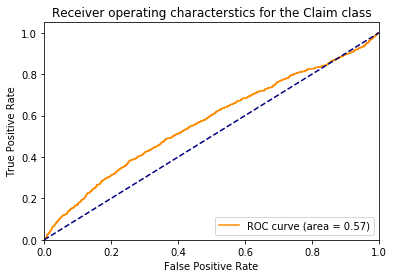

Simulation for top  50 features
2816/3953 [====================>.........] - ETA: 0sThe accuracy in % is  70.8322792816
Confusion matrix, without normalization
[[2618  241]
 [ 912  182]]


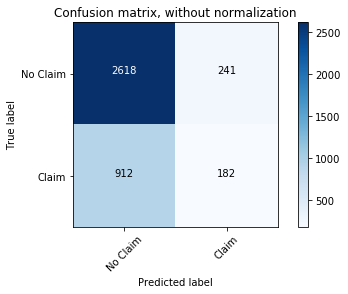

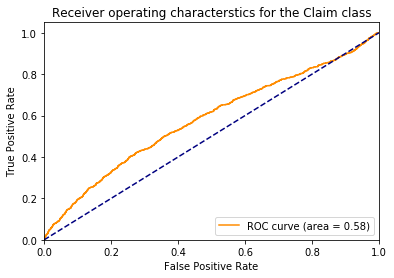

Simulation for top  100 features
2784/3953 [====================>.........] - ETA: 0sThe accuracy in % is  70.0733620035
Confusion matrix, without normalization
[[2577  282]
 [ 901  193]]


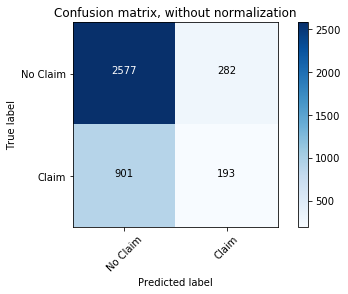

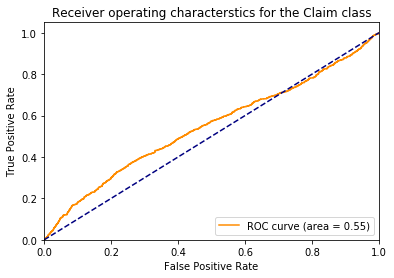

Simulation for top  150 features
1984/3953 [==============>...............] - ETA: 0sThe accuracy in % is  69.6686061219
Confusion matrix, without normalization
[[2515  344]
 [ 855  239]]


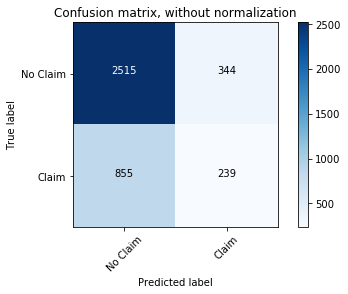

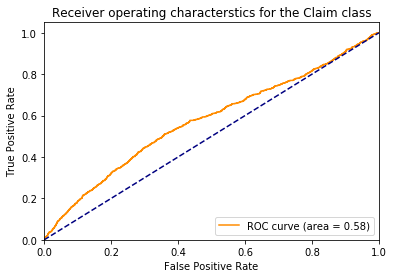

Simulation for top  200 features
2496/3953 [=================>............] - ETA: 0s The accuracy in % is  68.1001770807
Confusion matrix, without normalization
[[2441  418]
 [ 843  251]]


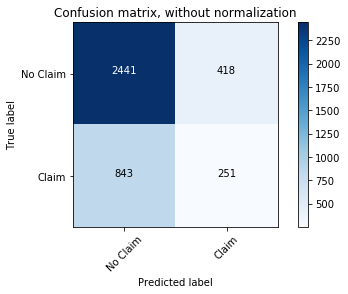

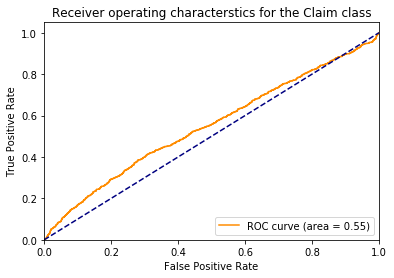

Simulation ended


In [24]:
# Creating feature spaces of differnt size using the Chi^2 test (Univariate selection) and recording the results for the DNN below
space = [10,30,50,100,150,200]
for i in space:
    print('Simulation for top ', i, 'features')
    kbest = SelectKBest(chi2, k=i)
    fit = kbest.fit(X, Y)
    #print(fit.scores_)
    features = fit.transform(X)
    get_results(features,i)

print('Simulation ended')

# Conclusion

1.	Data Set is a mixture of the categorical, binary and the continuous variables.    
2.	The target class (binary) is highly imbalanced, with only 3% of samples belonging to the 'CLAIM' class.   
3.	Binary variable analysis is conducted to see how strongly each variable is associated with the target variable.  Hence, binary variables are the most important in predictions. For example, these binary variables might be questions like ‘Have you ever met with an accident before’.
4.	The continuous variables (calc and ind values) does not represent any variance in two groups of data (Claim Vs. No Claim). This is concluded by looking on the Mean, distribution curves and Standard deviation of different samples.
5.	Pearson correlation is conducted to see the relation among the continuous variables. Which comes out be very low again except for a few.        
6.	PCA is done and concluded that 24 PC represents the 100 % of variance, but for sake of simplicity we will keep PC to be 4 only. Hence, reducing the dimensionality.             
7.	We also found that our assumption regarding the categorical variables is wrong.     
8.	Finally, we concluded that there is no variance among the continuous variable of different group of people who claimed and who do not claim the insurance. 
9.	In feature selection process the univariate feature selection process is the important one.    
10.	The best performing model for this problem set are Deep Learning and Random Forest.
11.	Deep Learning models are prone to overfitting most of the time, even with higher number of      epochs, the accuracy did not improve.
12.	At last, to solve the problem in great detail PS should at least reveal the feature name and what they mean it will be a great help is understanding and solving problem.
